# "Продвинутый Python". Магистерская программа ВШЭ.

### Краснова Дарья мФТиАД181

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [1]:
import time
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import numpy as np

Напишем функцию которая генерирует массив целых чисел из промежутка [0;5]. 

Хотим, чтобы чтобы $N/3 + \epsilon $ элементов были нулями.

In [2]:
def make_arr(arr_size = 100, elmnt = 0, low = 0, high = 5):
    """
        This function generates an array [low, high] with more than arr_size / 3 elements equal elmnt
        
        :param arr_size: size of array
        :type arr_size: int
        :param elmnt: target element
        :type elmnt: int
        :param low: lowest value of array
        :type low: int
        :param high: highest value of array
        :type high: int
        
        :returns: New array
        :rtype: list
    """
    #зададим вероятность выпадения встречания elmnt (>0.33)
    element_probability = (arr_size // 3 + np.random.randint(1, arr_size // 3)) / arr_size
    #создаем массив чисел из отрезка [0;5] 
    arr = [np.random.randint(low, high + 1) if (np.random.random() < element_probability) \
           else elmnt for _ in range(arr_size)]

    return list(arr)

In [3]:
#see results
make_arr(10)

[3, 0, 0, 4, 0, 0, 0, 0, 0, 4]

In [4]:
from functools import partial

def delete_elements_from_array(array, element = 0):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    index_element = None
    element_counter = 1 #количество подряд идущих element
    
    for i in range(len(array)):
        #запоминаем сколько мы встретили к данному моменту element 
        if array[i] == element:
            
            if index_element == i-1:
                element_counter += 1     
            else:
                element_counter = 1
            #запоминаем индекс последнего встреченного element
            index_element = i
            
        elif array[i] != element:
            #Если еще не встречали element 
            if index_element == None:
                continue
            #вставляем первое не element на место первого вхождения element
            array[index_element - element_counter + 1] = array[i]
            array[i] = element
            #запоминаем индекс последнего вхождения element
            index_element = i
       
    return array[:-element_counter]

#Идейно: при прямом проходе array хотим итерационно сдвигать нули в конец 
#(запоминая индексы и их количество), а потом от них избавиться

In [5]:
a = make_arr(10)
a

[5, 4, 3, 0, 5, 3, 0, 0, 0, 0]

In [6]:
delete_elements_from_array(a)

[5, 4, 3, 5, 3]

Рассмотри интересные случаи

In [7]:
delete_elements_from_array([0,0,0,0])

[]

In [8]:
delete_elements_from_array([5,0,0,4])

[5, 4]

In [9]:
delete_elements_from_array([5,0,4,4,0])

[5, 4, 4]

In [10]:
delete_elements_from_array([0,0,5,0,1,1,0])

[5, 1, 1]

In [11]:
delete_elements_from_array([0,0,5,0,0,4,1])

[5, 4, 1]

In [12]:
delete_elements_from_array([0,1,0])

[1]

Теперь построим график

In [13]:
array_of_lenths = np.linspace(start=1e2, stop=4e3, num=100, dtype = int)

In [14]:
np.random.seed(123)

spent_time = []
amount_of_iterations = 50 #для получения мат ожидания поведения функции
for len_of_array in array_of_lenths:
    end_time = []
    for _ in range(amount_of_iterations):
        tmp_arr = make_arr(len_of_array)
        start_time = time.time()
        _ = delete_elements_from_array(tmp_arr)
        end_time.append((time.time() - start_time))
    spent_time.append(np.mean(end_time))

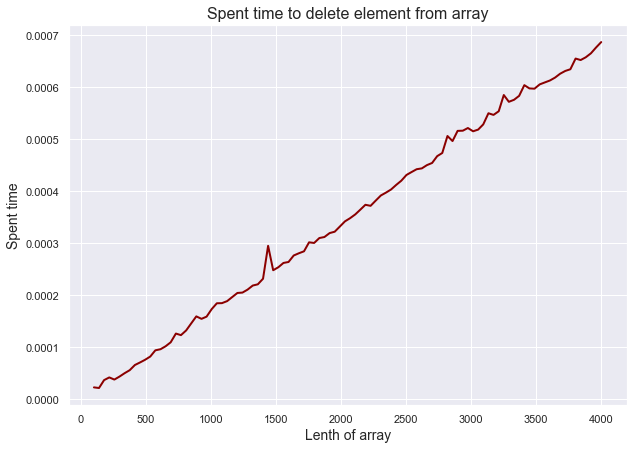

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(array_of_lenths, spent_time, color='darkred', linewidth=2);
plt.xlabel('Lenth of array', size=14)
plt.ylabel('Spent time', size=14)
plt.title('Spent time to delete element from array', size=16)
plt.show();

Видим, что зависимость получилась линейной. Класс!

Зачем нужна doc string? Как её посмотерть?

[Docstring](https://devman.org/qna/13/chto-takoe-docstring-s-chem-ego-edjat/) - строковая переменная, которая идет сразу за объявлением модуля, функции, класса, метода. Таким образом питон предоставляет удобный способ добавления документации.

In [16]:
print(delete_elements_from_array.__doc__)


        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    


### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [17]:
import cmath

def find_complex_number_module(complex_number):
    """
        This function finds the module of complex number
        :param complex_number: complex number
        :type complex_number: cmath complex number (a + bj)
        
        
        :returns: module of complex number
        :rtype: int 
    """
    return complex_number.imag**2 + complex_number.real**2
    

def find_min_complex_number(complex_number_array):
    """
        This function finds the minimal complex number among given
        :param complex_number_array: array of complex numbers
        :type complex_number_array: list
        :type complex_number_array element: cmath complex number (a + bj)
        
        
        :returns: minimal complex number
        :rtype: cmath complex number
    """
    if len(complex_number_array) <= 1:
        return complex_number_array
    
    else:
        min_complex_number_module = find_complex_number_module(complex_number_array[0])
        min_complex_number = complex_number_array[0]
        
        for complex_number in complex_number_array[1:]:
            if find_complex_number_module(complex_number) <= min_complex_number_module:
                min_complex_number = complex_number
                
        return min_complex_number

In [18]:
find_min_complex_number([6+2j,3+5j,5+2j])

(5+2j)

In [19]:
find_min_complex_number([0,3+5j,5+2j])

0

In [20]:
find_min_complex_number([-1])

[-1]

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

Used links
1. [Fibonacci algorithm](https://younglinux.info/algorithm/fibonacci)
2. [Greatest common divisor (GCD)](https://www.geeksforgeeks.org/gcd-in-python/)
3. [Chunk seq](https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length)

In [21]:
class MyException(Exception):
    def __init__(self, message):
        self.message = message
        super().__init__(message)

In [22]:
from functools import lru_cache
from itertools import permutations


In [23]:
# def generate_fibonacci_number(n):
#     """
#         This function generates Fibonacci value of input n
#         :param n: index of Fibonacci number to calculate
#         :type n: int
        
#         :returns: n-th Fibonacci number
#         :rtype: int
#     """
#     if n < 0:
#         raise MyException('Ошибка! Проверьте корректность ввода')
#     if n == 0:
#         return 0
#     if n in (1, 2):
#         return 1
    
#     fibonacci_1, fibonacci_2 = 0, 1
#     for _ in range(n):
#         fibonacci_1, fibonacci_2 = fibonacci_2, fibonacci_1 + fibonacci_2
#     return fibonacci_1

@lru_cache(maxsize=2**10)
def generate_fibonacci_number(n):
    """
        This function generates Fibonacci value of input n
        :param n: index of Fibonacci number to calculate
        :type n: int
        
        :returns: n-th Fibonacci number
        :rtype: int
    """
    if n < 0:
        raise MyException('Ошибка! Проверьте корректность ввода')

    fibonacci_array = [0, 1]
    for i in range(2, n + 1):
        fibonacci_array.append(fibonacci_array[i - 1] + fibonacci_array[i - 2])
        
    return fibonacci_array[n]
#generate_fibonacci_number(9999)

def find_greatest_common_divisor(number_1, number_2):
    """
        This function finds the Greatest Common Divisor (GCD) of x and y using Euclid's algorithm
        :param number_1: 1st number
        :type number_1: int
        :param number_2: 2nd number
        :type number_2: int
        
        :returns: GCD(number_1, number_2)
        :rtype: int
    """
    while(number_2): 
        number_1, number_2 = number_2, number_1 % number_2 
    return number_1

In [24]:
find_greatest_common_divisor(12,8), find_greatest_common_divisor(8,24)

(4, 8)

In [25]:
[generate_fibonacci_number(i) for i in range(13)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

In [26]:
def chunk_card_number(sequence, num_parts = 4):   
    """
        This function chunk sequence to num_parts equal parts
        :param sequence: sequence to chunk
        :type number_1: int
        :param num_parts: number of parts 
        :type number_2: int
        
        :returns: array of chunks from input sequence
        :rtype: array of int
    """
    if type(sequence) != int:
        raise MyException('Ошибка ввода!')
        
    sequence = str(sequence)
    if len(sequence) % num_parts != 0:
        raise MyException('Ошибка! Последовательность не может быть разбита на равные части')

        
    number_elements_in_one_chunk = len(sequence) // num_parts
    chunks = [sequence[i * number_elements_in_one_chunk : (i + 1) * number_elements_in_one_chunk] \
              for i in range(num_parts)]
    return np.array(chunks, dtype = int)
    

In [27]:
chunk_card_number(123,3)

array([1, 2, 3])

In [28]:
def main_function_atm_process(card_number, card_pin):
    """
        This function chunk sequence to num_parts equal parts
        :param card_number: bank card number of 16 symbols
        :type card_number: int 
        :param card_pin: bank card pin of 4 symbols
        :type card_pin: int
        
        :returns: median of 
        :rtype: array of int
    """
    if len(str(card_number)) != 16 or len(str(card_pin)) != 4 \
        or card_number < 0 or card_pin < 0:
        raise MyException('Ошибка! Проверьте корректность ввода данных карты')
    
#     #Опция считывания номера вставленной в банкомат карты
#     card_number = int(input("Введите номер карты: "))
#     card_pin = int(input("Введите пин карты: "))

    #парсим номер вставленной в автомат карты на 4 равные части
    numbers_array = chunk_card_number(card_number)
    
    #генерируем 4 числа Фибоначчи с номерами, соответствущими полученным частям
    fibonacci_numbers_array = list(map(generate_fibonacci_number, numbers_array))
    
    #генерируем всевозможные перестановки полученных чисел Фибоначчи
    fibonacci_array_permutations = list(permutations(fibonacci_numbers_array))
    
    #Полученные перестановки преобразуем в числа
    #Для каждого числа из полученного набора банкомат находит НОД с введеным 
    #пользователем паролем
    greatest_common_divisors_array = []
    for fibonacci_permutations_element in fibonacci_array_permutations:
        fibonacci_permutations_number = int(''.join(map(str, fibonacci_permutations_element)))
        greatest_common_divisors_array.append(find_greatest_common_divisor(fibonacci_permutations_number, card_pin))
        
    #возвращаем медиану из полученных НОДов
    return int(np.median(greatest_common_divisors_array))

In [29]:
main_function_atm_process(card_number= 4444444444444444, card_pin= 3333)

3333

In [30]:
main_function_atm_process(card_number= 5000000000000000, card_pin= 5000)

1875

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количество баллов зависит от полноты сравнения.

In [31]:
import sys
from collections import deque

Сравним скорость работы

In [32]:
array_of_lenths = np.linspace(start=1e0, stop=5e4, num=51, dtype = int)
np.random.seed(123)

In [33]:
def calc_speed_of_work_of_structure(array_of_lenths, structure, action, action_params = None, amount_of_iterations = 100):
    """
        This function calculates the speed of action over structure
        :param array_of_lenths: array of lenths of structure
        :type array_of_lenths: array of int
        :param structure: type of structure 
        :type structure: list or deque
        :param action: method applied to structure 
        :type action: method
        :param action_params: parameters for method 
        :type action_params: tuple
        :param amount_of_iterations: how many times method applied to calculate mean speed
        :type amount_of_iterations: int
        
        :returns: time that is taken to apply method to structure according to it's length (quantiles)
        :rtype: arrays of float
    """
    spent_time = []
    spent_time_q25 = []
    spent_time_q75 = []
    spent_time_q50 = []
    
    structure_size = []
    
    
    for len_of_array in array_of_lenths:
        end_time = []
        for _ in range(amount_of_iterations):
            
            tmp_arr = structure(np.random.randint(100, size = len_of_array))
            
            if str(action).find('count') != -1 or str(action).find('remove') != -1:
                index_of_searching_element = tmp_arr[len_of_array//2] #чтобы мы удаляли существующий элемент
                start_time = time.time()
                action(tmp_arr, index_of_searching_element)
                end_time.append((time.time() - start_time))

            else:
                start_time = time.time()
                action(tmp_arr, *action_params)
                end_time.append((time.time() - start_time))
                
        structure_size.append(sys.getsizeof(tmp_arr))
        
        spent_time_q25.append(np.quantile(end_time, 0.25))
        spent_time_q75.append(np.quantile(end_time, 0.75)) 
        spent_time_q50.append(np.quantile(end_time, 0.50))   
        spent_time.append(np.mean(end_time))
        
    return(spent_time, spent_time_q25, spent_time_q50, spent_time_q75, structure_size)

In [34]:
def plot_speed_structure(array_of_lenths, action_structure_1, action_structure_2, 
                         action_params_structure_1, action_params_structure_2, plot_title = None):
    """
        This function plots the dependence between lenth of 2 structures (list, deque) and the time that is spent 
        to apply a method to this structure
        :param array_of_lenths: array of lenths of structure
        :type array_of_lenths: array of int
        :param action_structure_1: method applied to structure_1 
        :type action_structure_1: method
        param action_structure_2: method applied to structure_2 
        :type action_structure_2: method       
        :param action_params_structure_1: parameters for method applied to structure_1 
        :type action_params_structure_1: tuple
        :param action_params_structure_2: parameters for method applied to structure_2
        :type action_params_structure_2: tuple
        :param plot_title: Title of the plot
        :type plot_title: str
        
        :returns: --
        :rtype: --
    """
    times_structure_1, times_structure_1_q25, times_structure_1_q50, times_structure_1_q75, list_size = calc_speed_of_work_of_structure(array_of_lenths, list, action_structure_1, \
                                                        action_params_structure_1)
    
    times_structure_2, times_structure_2_q25, times_structure_2_q50, times_structure_2_q75, deque_size = calc_speed_of_work_of_structure(array_of_lenths, deque, action_structure_2, \
                                                        action_params_structure_2)
    
    
    plt.figure(figsize=(16, 20))
    plt.subplot(211)
    
    #plot speed
    
    #list
    #plt.plot(array_of_lenths, times_structure_1, color='darkred', label = 'List', linewidth=2)
    plt.plot(array_of_lenths, times_structure_1_q50, color='darkred', label = 'List_quantile_0.5', linewidth=2)
    plt.fill_between(array_of_lenths, times_structure_1_q25, times_structure_1_q75, facecolor='darkred', interpolate=True, alpha=0.3)
    
    #deque
    #plt.plot(array_of_lenths, times_structure_2, color='darkgreen', label = 'Deque', linewidth=2)
    plt.plot(array_of_lenths, times_structure_2_q50, color='darkgreen', label = 'Deque_quantile_0.5', linewidth=2)
    plt.fill_between(array_of_lenths, times_structure_2_q25, times_structure_2_q75, facecolor='darkgreen', interpolate=True, alpha=0.3)
    
    plt.legend(fontsize=20)
    plt.xlabel('Lenth of structure', size=20)
    plt.ylabel('Spent time', size=20)
    plt.title(plot_title, size=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    #plot memory
    
    plt.subplot(212)
    #list
    plt.plot(array_of_lenths, list_size, color='darkred', label = 'List_size', linewidth=2)
    #deque
    plt.plot(array_of_lenths, deque_size, color='darkgreen', label = 'Deque_size', linewidth=2)

    plt.legend(fontsize=20)
    plt.title(plot_title, size=24)
    plt.xlabel('Lenth of structure', size=20)
    plt.ylabel('Spent memory', size=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    plt.subplots_adjust(hspace=0.2)
    plt.show();



In [35]:
element_to_insert = np.random.randint(100,size = 1)

Приведем сравнение скорости работы и потребление памяти (на структуру) list и deque на примере функций, реализованных для [collections.deque](https://docs.python.org/2/library/collections.html)

Будем рисовать 50% квантиль с доверительным интервалом в квантили 25% и 75% соответственно.

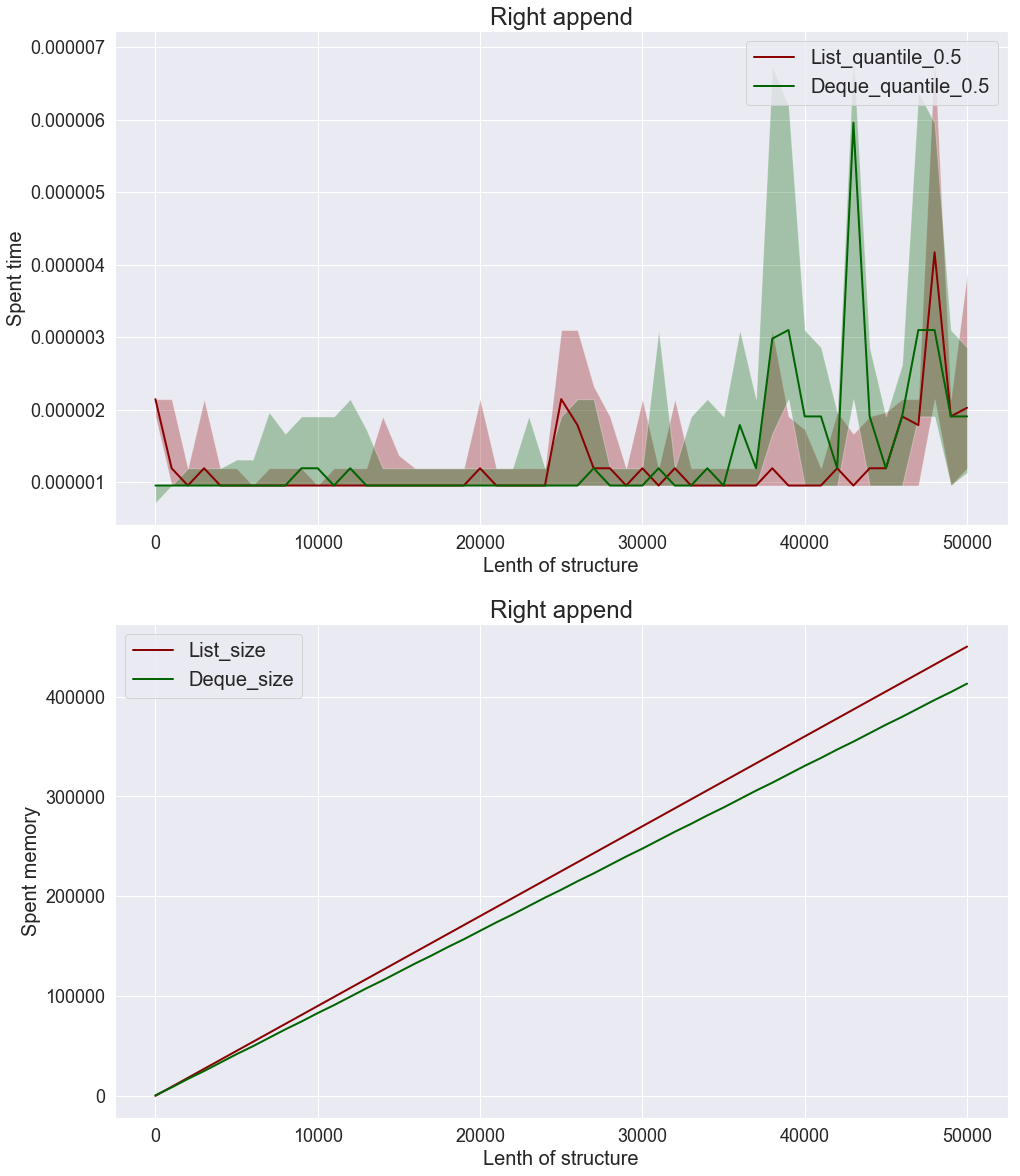

In [36]:
#Right append
plot_speed_structure(array_of_lenths, list.append, deque.append, (element_to_insert), (element_to_insert), 'Right append')

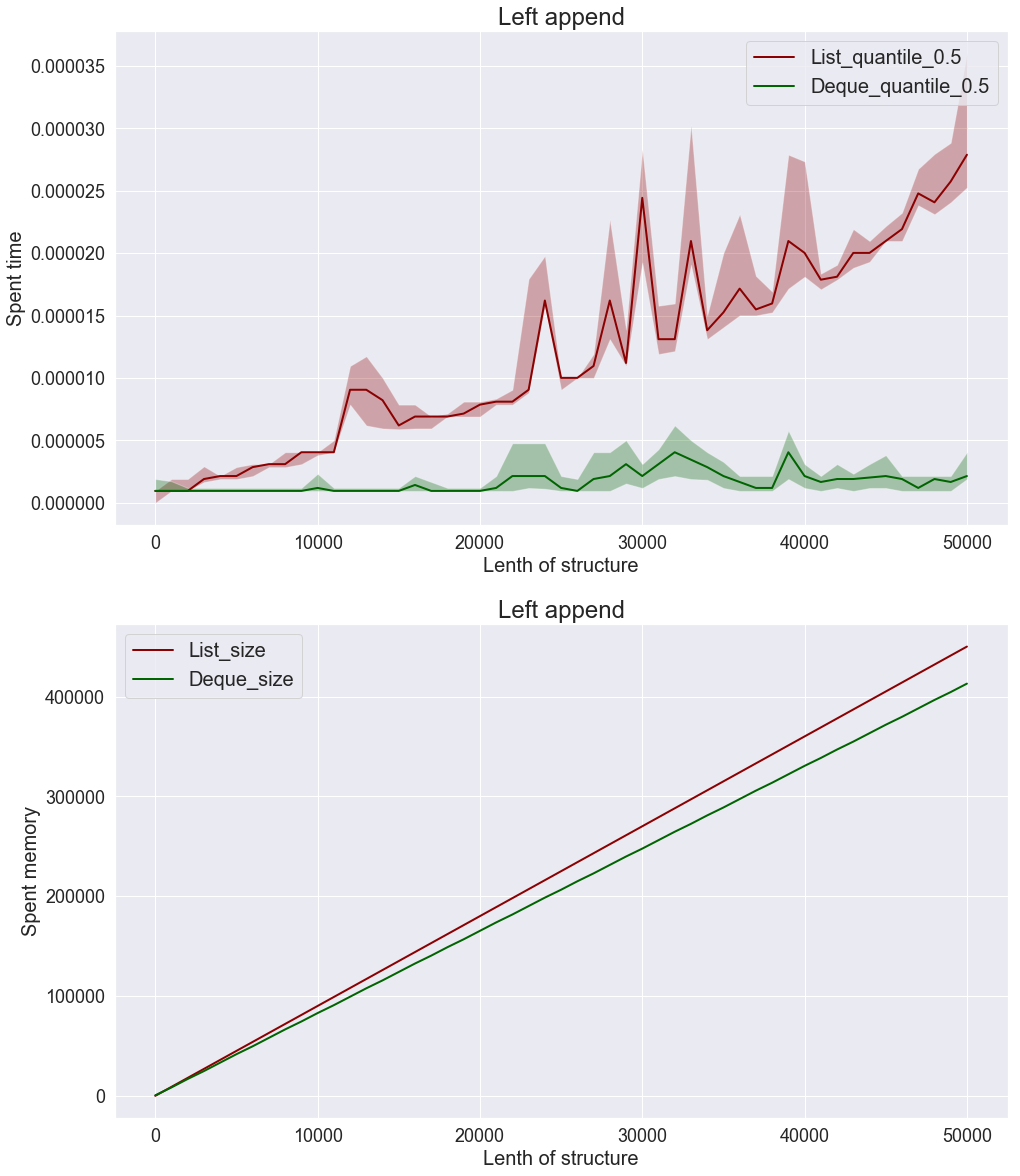

In [37]:
#Left append
plot_speed_structure(array_of_lenths, list.insert, deque.appendleft, (0, element_to_insert[0]), (element_to_insert), 'Left append')

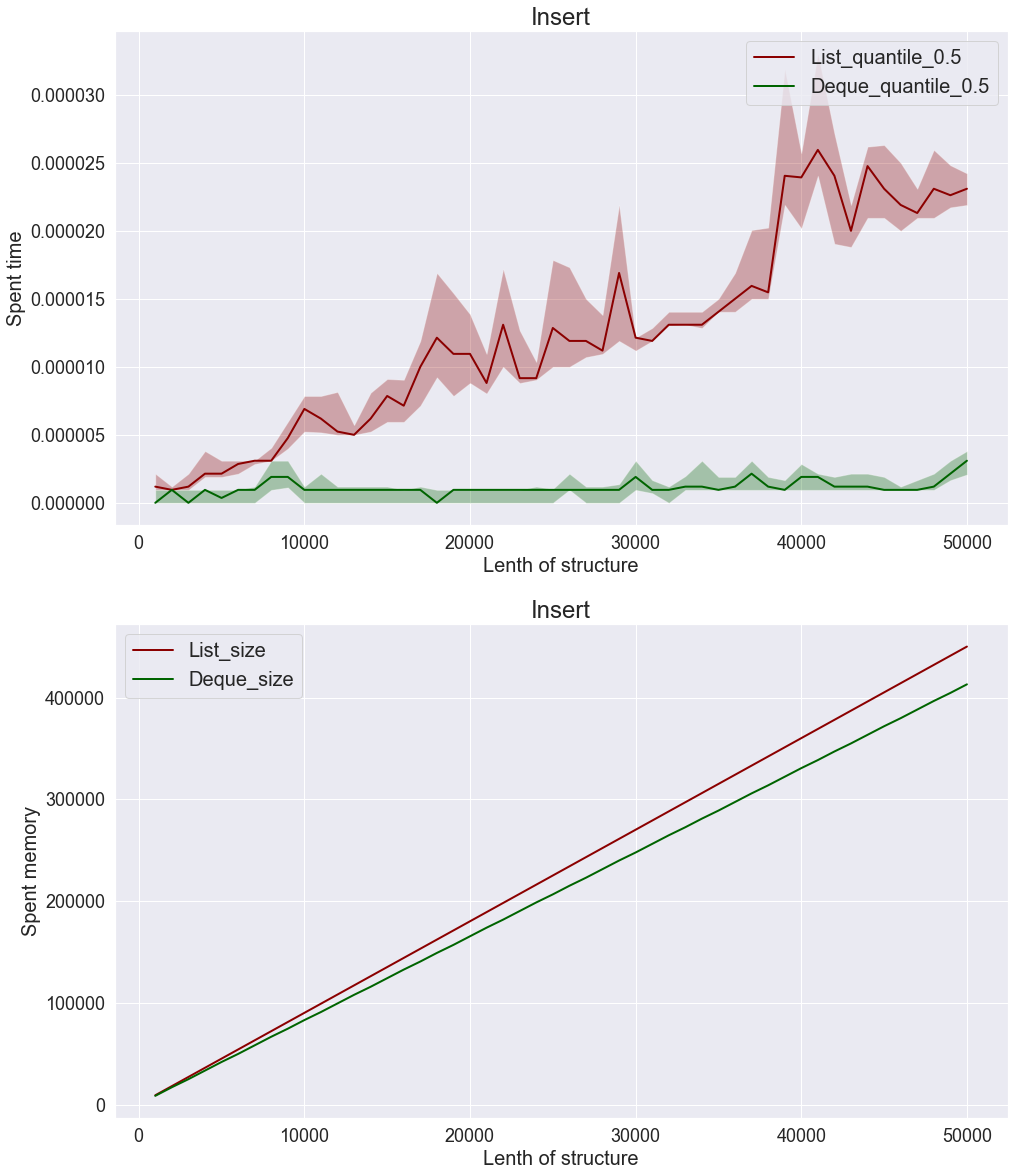

In [38]:
#Insert
indx = 10
plot_speed_structure(array_of_lenths[1:], list.insert, deque.insert, (indx, element_to_insert[0]), (indx, element_to_insert[0]), 'Insert')

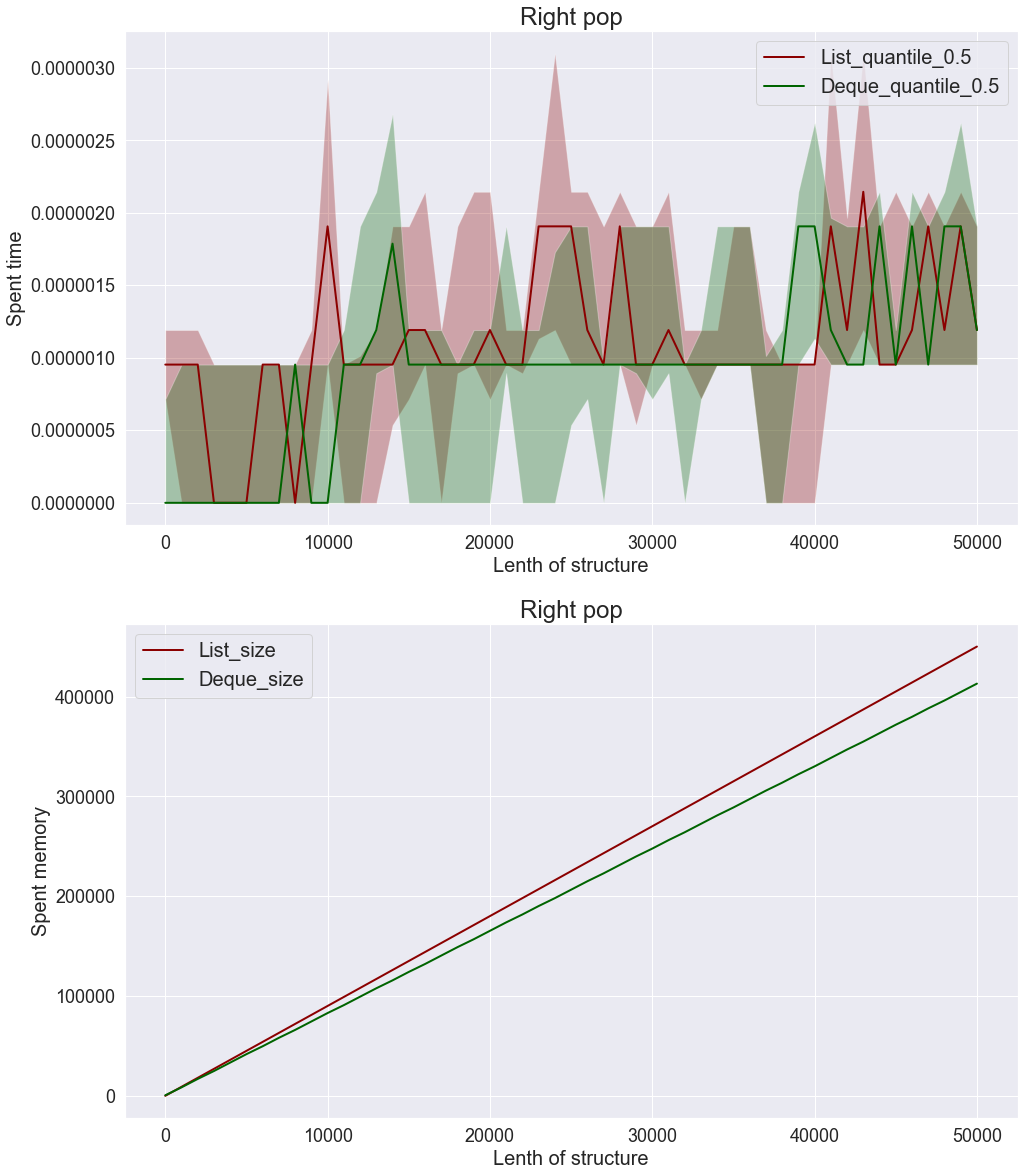

In [39]:
#Right pop
plot_speed_structure(array_of_lenths, list.pop, deque.pop, [], [], 'Right pop')

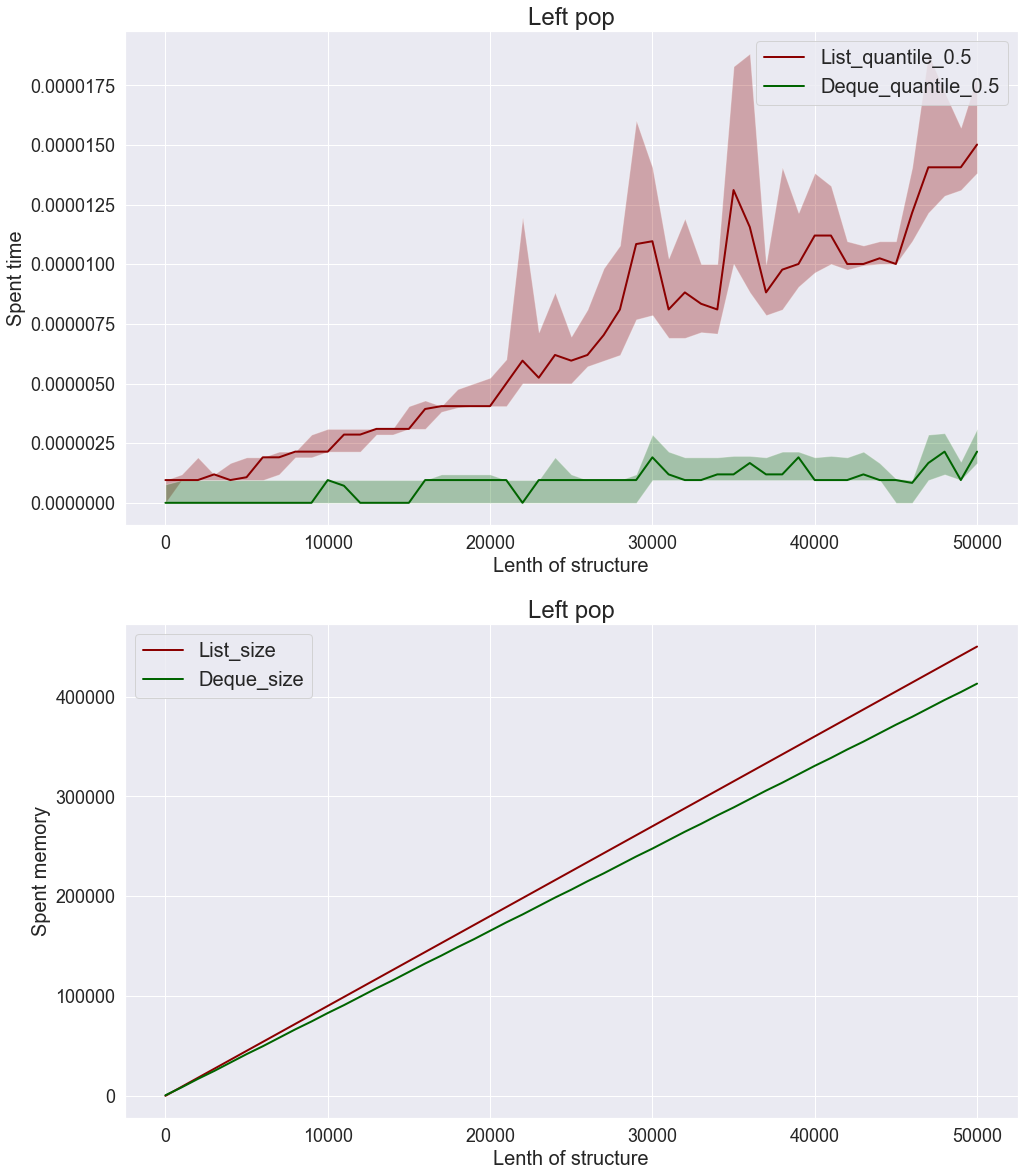

In [40]:
#Left pop
plot_speed_structure(array_of_lenths, list.pop, deque.popleft, [0], [], 'Left pop')

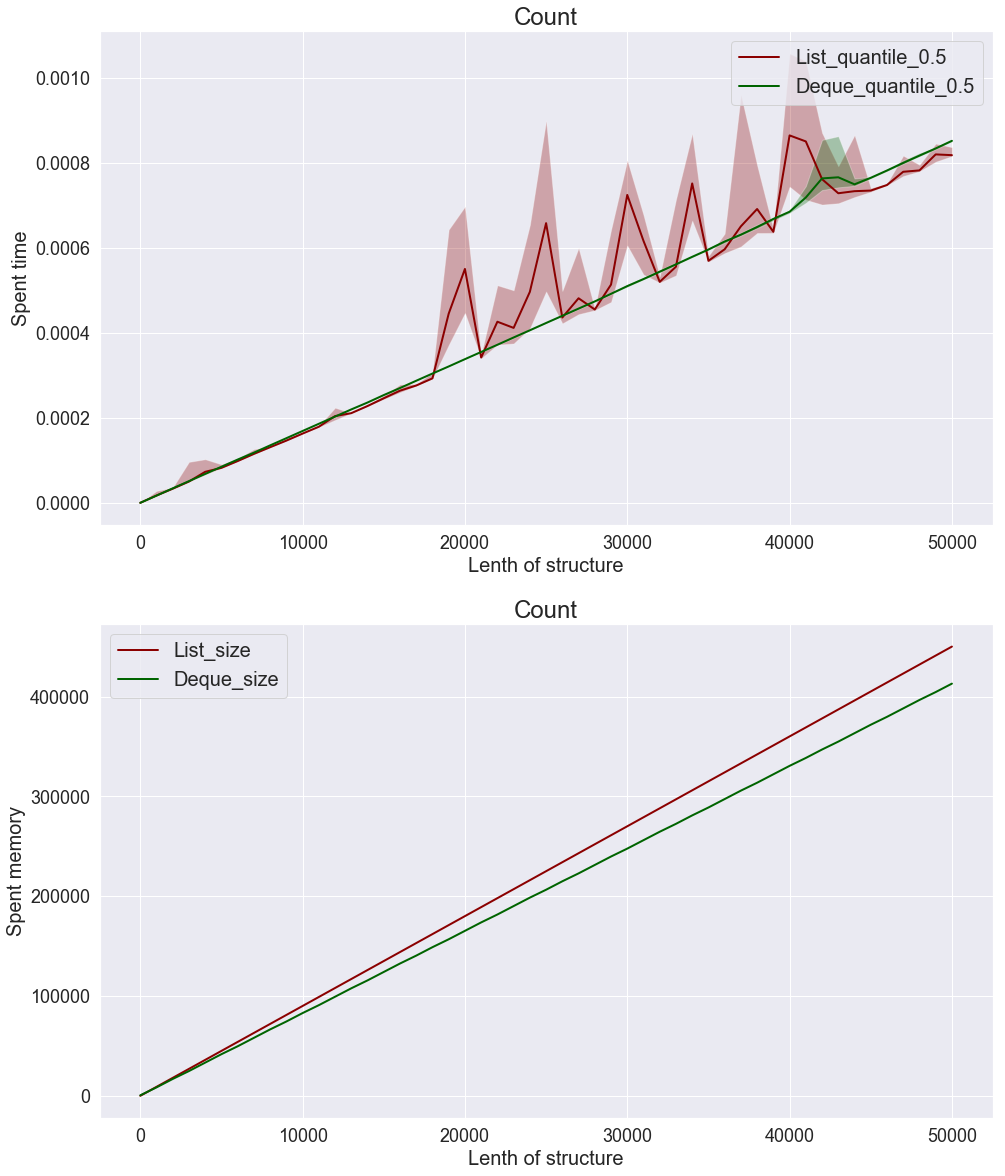

In [41]:
#Count
plot_speed_structure(array_of_lenths, list.count, deque.count, [], [], 'Count')

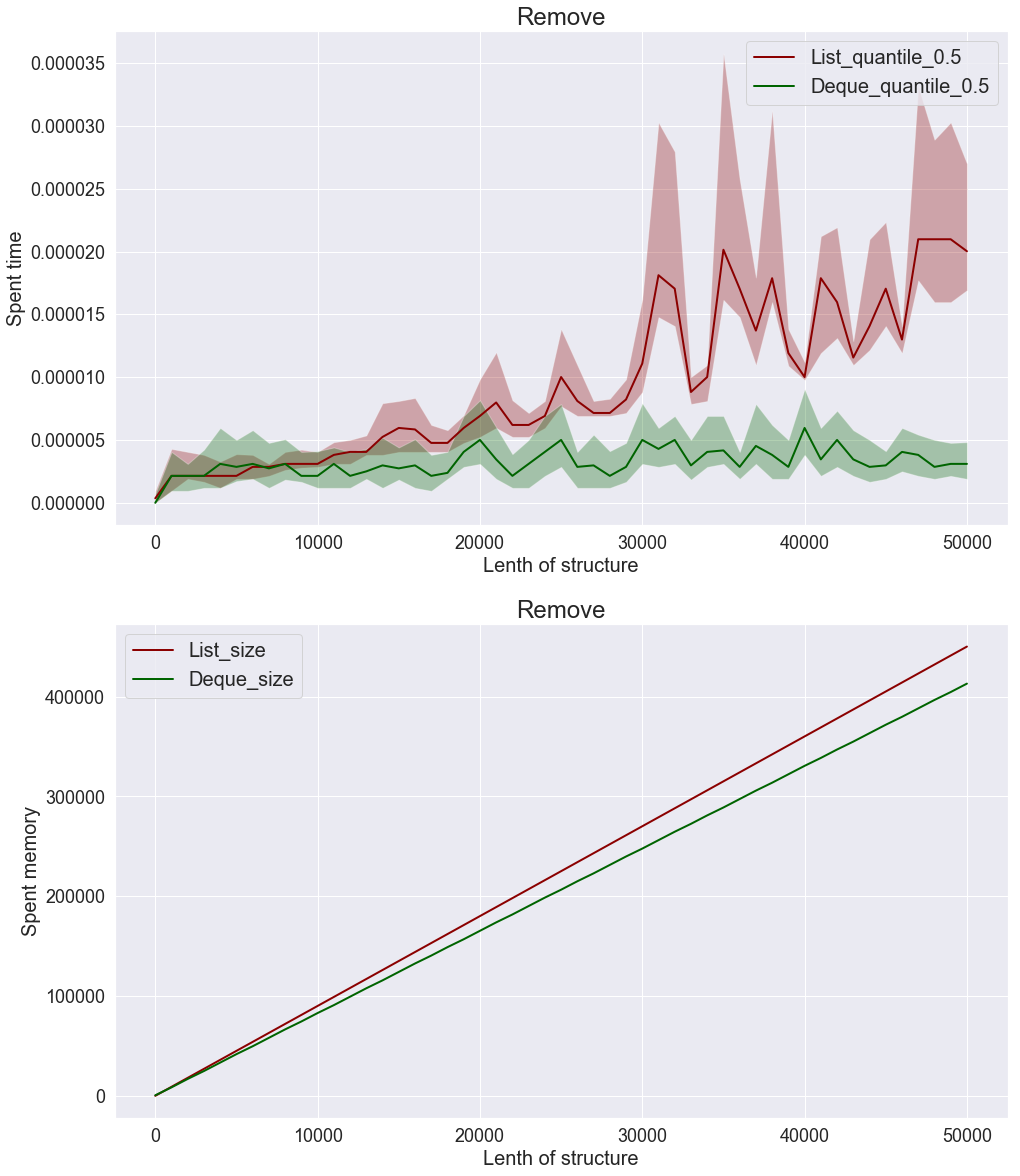

In [42]:
#Remove
plot_speed_structure(array_of_lenths, list.remove, deque.remove, [], [], 'Remove')

In [43]:
def list_rotation(list_to_rotate, number_of_elements):
    """
        This function put number_of_elements from the beginning of list to the end
        :param list_to_rotate: list to be rotated
        :type list_to_rotate: list
        :param number_of_elements: number of elements that should be putted to the end
        :type number_of_elements: int
        
        :returns: --
        :rtype: list
    """
    return list_to_rotate[-number_of_elements:] + list_to_rotate[:-number_of_elements]

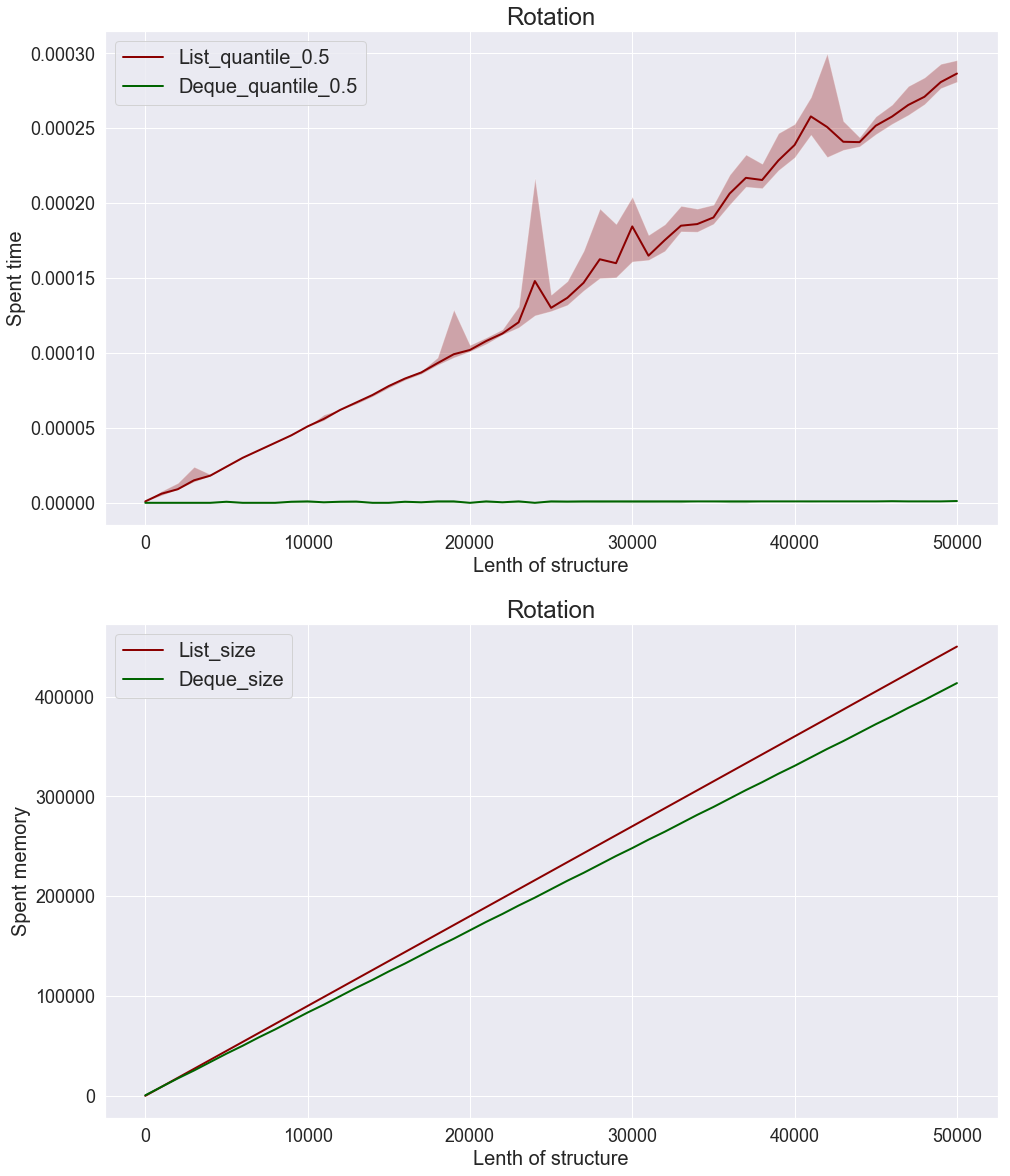

In [44]:
#Remove
plot_speed_structure(array_of_lenths, list_rotation, deque.rotate, [5], [5], 'Rotation')

[deque](https://python-scripts.com/import-collections)
В соответствии с документацией Python, deque – это обобщение стеков и очередей. Они являются контейнером замен для списка Python. Они защищены от потоков и поддерживают эффективность соединения памяти, а также сноски с обеих сторон deque. Список оптимизирован под быстрые операции с фиксированной длиной.

Видим, что deque лучше list справляется с задачами взаимодействия с первыми элементами последовательности. 

Остальные результаты сопоставимы.

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количество баллов зависит от полноты сравнения.

In [45]:
from itertools import permutations

In [46]:
def recursive_permutation_function(array, array_of_permutations, k=0):
    """
        This function generates permutations for the given array
        :param array: array to be permuted
        :type array: list
        :param array_of_permutations: array of permutations
        :type array_of_permutations: list of lists
        :param k: index of outer loop
        :type k: int

        :returns: array of all permutations of array
        :rtype: list of lists
    """
    if type(k) != int:
        raise MyException('Ошибка! Проверьте корректность ввода')

    if k == len(array):
        array_of_permutations.append(array[:])
    else:
        for i in range(k, len(array)):
            array[k], array[i] = array[i], array[k]
            recursive_permutation_function(array, array_of_permutations, k+1)
            array[k], array[i] = array[i], array[k]
    return array_of_permutations
    
def make_permutations(array):
    """
        This function generates permutations for the given array
        :param array: array to be permuted
        :type array: list
        
        :returns: array of all permutations of array
        :rtype: list of lists
    """
    return recursive_permutation_function(array, [], k = 0)

Идея алгоритма взята из [Fundamentals of Data Structures](https://lpuguidecom.files.wordpress.com/2017/04/fundamentals-of-data-structures-ellis-horowitz-sartaj-sahni.pdf)

In [47]:
def return_itertools_permutations(*args):
    """
        This function returns list of permutations for the given array from itertools.permutations

        :returns: array of all permutations of array
        :rtype: list of lists
    """
    return [_ for _ in permutations(*args)]

In [48]:
make_permutations([1,2,3])

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 2, 1], [3, 1, 2]]

In [49]:
array_of_lenths_for_permutations = np.linspace(4, 8, 5, dtype = int)
array_of_lenths_for_permutations

array([4, 5, 6, 7, 8])

In [50]:
def calc_speed_of_work(function_to_calc, array_of_lenths_for_permutations, amount_of_iterations = 50):
    """
        This function calculates the speed of work of function
        :param function_to_calc: function which speed of work is tested
        :type array_of_lenths_for_permutations: function
        :param array_of_lenths_for_permutations: array of lenths of elements for function
        :type array_of_lenths: array of int
        :param amount_of_iterations: how many times function applied to calculate mean speed
        :type amount_of_iterations: int
        
        :returns: time that is taken to apply function
        :rtype: array of float
    """
    spent_time = []
    structure_size = []
    
    for len_of_array in array_of_lenths_for_permutations:
        end_time = []
        for _ in range(amount_of_iterations):            
            tmp_arr = list(np.random.randint(100, size = len_of_array))
            
            start_time = time.time()
            function_to_calc(tmp_arr)
            end_time.append((time.time() - start_time))
        spent_time.append(np.sum(end_time)/len(end_time))
    
    return(spent_time)

In [51]:
def plot_speed_function(array_of_lenths_for_permutations, permutation_function_1, permutation_function_2, 
                         plot_title = None):
    """
        This function plots the dependence between lenth of 2 structures (list, deque) and the time that is spent 
        to apply a method to this structure
        :param array_of_lenths_for_permutations: array of lenths of structure
        :type array_of_lenths_for_permutations: array of int
        
        :param action_structure_1: method applied to structure_1 
        :type action_structure_1: method
        param action_structure_2: method applied to structure_2 
        :type action_structure_2: method       
        :param action_params_structure_1: parameters for method applied to structure_1 
        :type action_params_structure_1: tuple
        :param action_params_structure_2: parameters for method applied to structure_2
        :type action_params_structure_2: tuple
        :param plot_title: Title of the plot
        :type plot_title: str
        
        :returns: --
        :rtype: --
    """
    plt.figure(figsize=(10, 7))
    
    #plot speed
    
    times_structure_1 = calc_speed_of_work(permutation_function_1, array_of_lenths_for_permutations)
    plt.plot(array_of_lenths_for_permutations, times_structure_1, color='darkred', label = 'User defined permutations', linewidth=2)
    
    times_structure_2 = calc_speed_of_work(permutation_function_2, array_of_lenths_for_permutations)
    plt.plot(array_of_lenths_for_permutations, times_structure_2, color='darkblue', label = 'Itertools permutations', linewidth=2)

    plt.legend(fontsize=16)
    plt.xlabel('Number of elements to permute', size=18)
    plt.ylabel('Spent time', size=18)
    plt.title(plot_title, size=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.show();


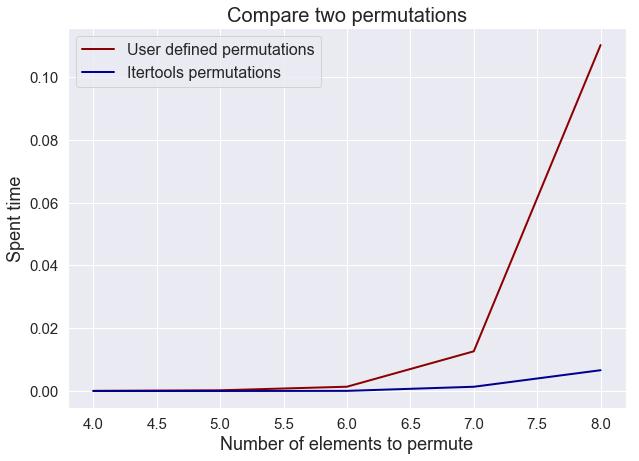

In [52]:
plot_speed_function(array_of_lenths_for_permutations, make_permutations, return_itertools_permutations, \
                         plot_title = 'Compare two permutations')

Подсчитаем затрачиваемую память

In [53]:
from memory_profiler import memory_usage

In [54]:
%load_ext memory_profiler

In [55]:
%memit make_permutations([3,8,5,4,5,6,3,2])

peak memory: 119.19 MiB, increment: 0.15 MiB


In [56]:
%memit return_itertools_permutations([3,8,5,4,5,6,3,2])

peak memory: 119.52 MiB, increment: 0.35 MiB


In [59]:
#max memory usage, in MiB. 
max(memory_usage((make_permutations, ([3,8,5,4,5,6,3,2],))))

120.5859375

In [60]:
max(memory_usage((return_itertools_permutations, ([3,8,5,4,5,6,3,2],))))

120.0546875